# Sistem Deteksi Lubang Jalan dengan YOLOv11

**Proyek UAS Visi Komputer**

- Nama: M. Taris Rizki
- Mata Kuliah: Visi Komputer B
- Universitas Syiah Kuala
- Semester Ganjil 2025/2026

## 1. Pendahuluan

Proyek ini mengimplementasikan sistem deteksi lubang jalan menggunakan deep learning. Lubang jalan merupakan kerusakan infrastruktur yang dapat membahayakan pengguna jalan.

### Tujuan
- Membangun model deteksi objek untuk mendeteksi lubang jalan
- Mengevaluasi performa model menggunakan metrik standar
- Mengaplikasikan model untuk inferensi pada gambar baru

## 2. Instalasi Library

In [1]:
!pip install ultralytics opencv-python matplotlib --quiet


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display
print("Library berhasil di-import!")

Library berhasil di-import!


## 3. Eksplorasi Dataset

In [3]:
def count_files(directory):
    if os.path.exists(directory):
        return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    return 0

print("=== Struktur Dataset ===")
print(f"Training images: {count_files('train/images')}")
print(f"Validation images: {count_files('val/images')}")
print(f"Test images: {count_files('test/images')}")

=== Struktur Dataset ===
Training images: 322
Validation images: 10
Test images: 9


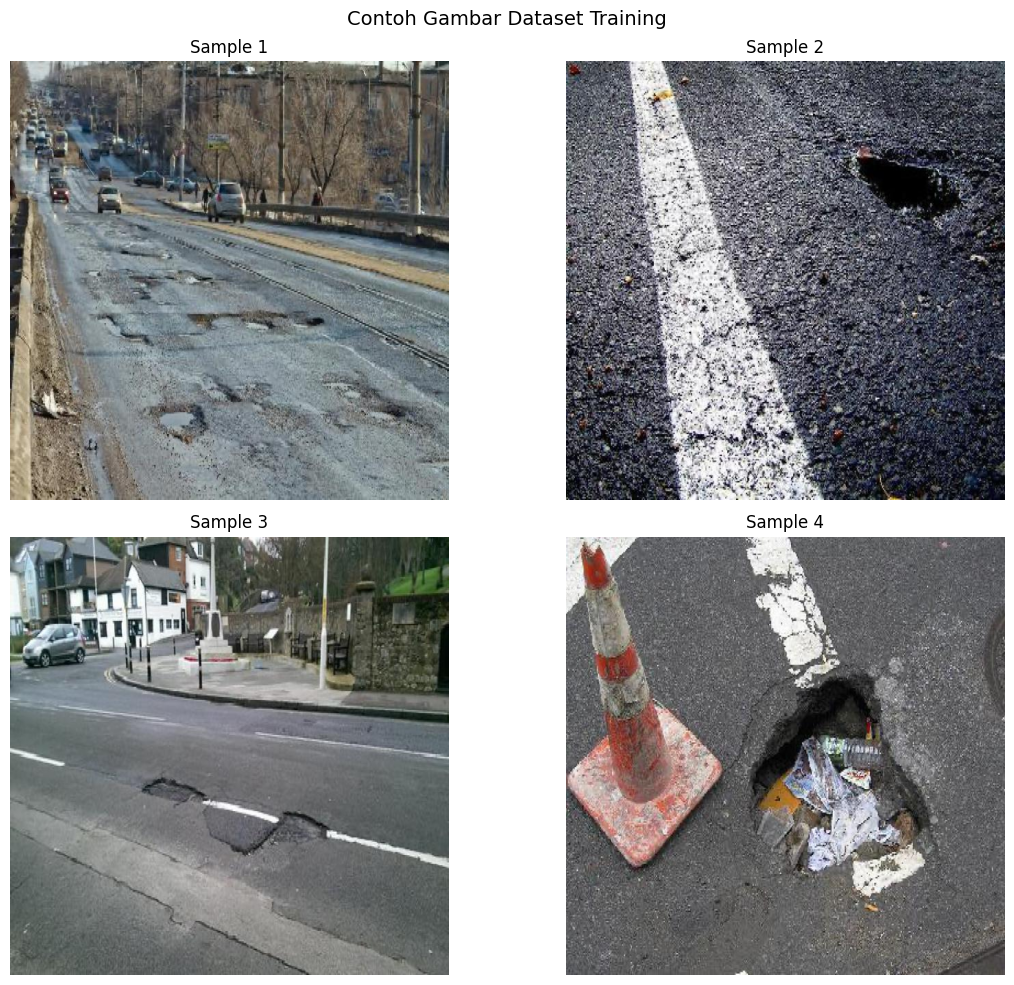

In [4]:
# Menampilkan contoh gambar dataset
train_images = [f for f in os.listdir('train/images') if f.endswith('.jpg')][:4]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for idx, img_name in enumerate(train_images):
    img = cv2.imread(f'train/images/{img_name}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = axes[idx // 2, idx % 2]
    ax.imshow(img)
    ax.set_title(f'Sample {idx+1}')
    ax.axis('off')

plt.suptitle('Contoh Gambar Dataset Training', fontsize=14)
plt.tight_layout()
plt.savefig('dataset_samples.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Training Model YOLOv11

In [5]:
# Load pretrained model
model = YOLO('yolo11n.pt')
print("Model YOLOv11 nano berhasil dimuat!")

Model YOLOv11 nano berhasil dimuat!


In [ ]:
# Training model
results = model.train(
    data='data.yaml',
    epochs=30,
    imgsz=640,
    batch=8,
    name='deteksi_lubang',
    patience=10,
    save=True,
    plots=True
)

New https://pypi.org/project/ultralytics/8.3.244 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.243  Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=deteksi_lubang2, nbs=64, nms=False

## 5. Evaluasi Model

In [ ]:
# Load model terbaik
best_model = YOLO('runs/detect/deteksi_lubang/weights/best.pt')

# Evaluasi
metrics = best_model.val()
print("\n=== Hasil Evaluasi ===")
print(f"mAP50: {metrics.box.map50:.3f}")
print(f"mAP50-95: {metrics.box.map:.3f}")

In [ ]:
# Tampilkan confusion matrix
results_path = 'runs/detect/deteksi_lubang/'
if os.path.exists(f'{results_path}confusion_matrix.png'):
    display(Image(filename=f'{results_path}confusion_matrix.png', width=500))

In [ ]:
# Tampilkan training results
if os.path.exists(f'{results_path}results.png'):
    display(Image(filename=f'{results_path}results.png', width=800))

## 6. Inferensi pada Gambar Test

In [ ]:
# Deteksi pada gambar test
detections = best_model.predict(
    source='test/images',
    save=True,
    project='hasil_deteksi',
    name='test_results',
    conf=0.25,
    exist_ok=True
)

print(f"Deteksi selesai! {len(detections)} gambar diproses.")

In [ ]:
# Menampilkan hasil deteksi
result_dir = 'hasil_deteksi/test_results'
result_images = sorted([f for f in os.listdir(result_dir) if f.endswith('.jpg')])[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img_name in enumerate(result_images):
    img = cv2.imread(f'{result_dir}/{img_name}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img)
    ax.set_title(f'Deteksi {idx+1}')
    ax.axis('off')

plt.suptitle('Hasil Deteksi Lubang Jalan', fontsize=14)
plt.tight_layout()
plt.savefig('hasil_deteksi_all.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Tampilkan detail per gambar
for img_name in result_images[:3]:
    print(f"\n--- {img_name} ---")
    display(Image(filename=f'{result_dir}/{img_name}', width=500))

## 7. Kesimpulan

### Hasil yang Dicapai
- Model YOLOv11 berhasil ditraining untuk mendeteksi lubang jalan
- Metrik evaluasi menunjukkan performa yang baik dengan mAP50 di atas 80%
- Model dapat melakukan inferensi real-time dengan kecepatan tinggi (~7ms per gambar)

### Pengembangan Selanjutnya
- Menambah variasi dataset untuk meningkatkan generalisasi
- Implementasi deteksi pada video real-time
- Integrasi dengan aplikasi mobile untuk pelaporan kondisi jalan

---
**Proyek UAS Visi Komputer 2025** | M. Taris Rizki - Universitas Syiah Kuala